In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.animation import FuncAnimation

In [2]:

# General parameters
n_samples = 500  # Total points per clustering
n_features = 2   # Points in 2D space

In [3]:
# Updated values of K for each subplot
k_values = [2, 3, 4, 5]

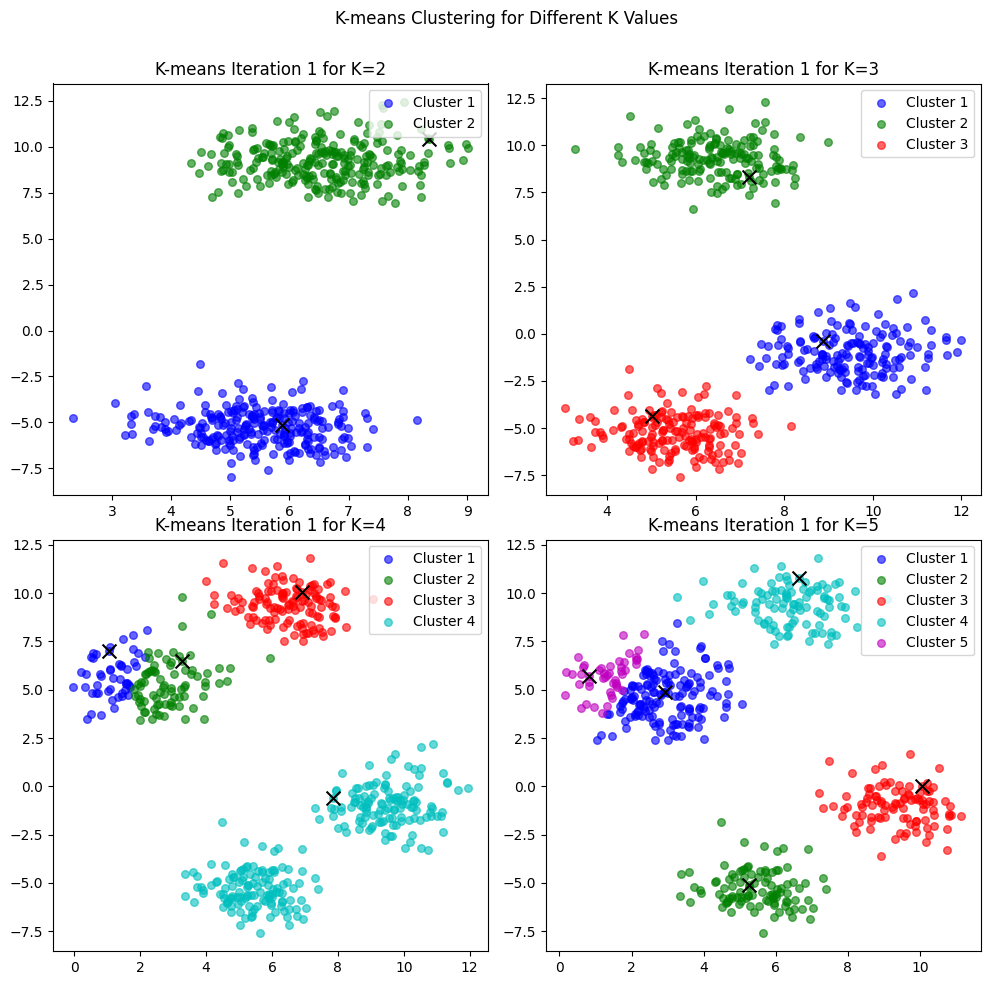

In [4]:
# Function to initialize and animate K-means clustering
def animate_kmeans(k_values, max_iters=10):
    # Set up the figure and subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle("K-means Clustering for Different K Values")
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

    # Initialize colors for clusters and set up centroids history for each K value
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    centroids_history = []

    # Generate data and initialize centroids history for each K
    for K in k_values:
        # Generate a separate dataset with the same K as the number of centers
        data, _ = make_blobs(n_samples=n_samples, centers=K, n_features=n_features, random_state=13)

        # Initialize random centroids and history tracking for each K
        centroids = data[np.random.choice(data.shape[0], K, replace=False)]
        history = [centroids.copy()]

        # Perform K-means to get centroid positions for each iteration
        for i in range(1, max_iters):
            # Assign points to nearest centroid
            labels = np.array([np.argmin([np.linalg.norm(point - centroid) for centroid in centroids]) for point in data])

            # Recompute centroids as the mean of each cluster
            new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(K)])
            history.append(new_centroids.copy())

            # Stop if centroids do not change
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

        centroids_history.append((history, K, data))  # Store history, K value, and data for each subplot

    def update(frame):
        # Clear each axis and update it with clustering data for its specific K
        for idx, (history, K, data) in enumerate(centroids_history):
            ax = axes[idx]
            ax.clear()  # Clear the plot for each frame

            # Get the centroids for the current frame
            current_centroids = history[min(frame, len(history) - 1)]
            labels = np.array([np.argmin([np.linalg.norm(point - centroid) for centroid in current_centroids]) for point in data])

            # Plot each cluster with its points
            for k in range(K):
                cluster_points = data[labels == k]
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=colors[k % len(colors)], alpha=0.6, label=f"Cluster {k+1}")
                ax.scatter(current_centroids[k, 0], current_centroids[k, 1], color='black', marker='x', s=100)  # Plot centroid

            ax.set_title(f"K-means Iteration {frame + 1} for K={K}")
            ax.legend(loc="upper right")

    # Create the animation with a 2-second interval between frames
    anim = FuncAnimation(fig, update, frames=max_iters, interval=2000, repeat=False)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit titles
    #plt.show()

    # Save the animation as a GIF
    anim.save('kmeans_animation_multiple_k.gif', writer='pillow', fps=0.5)  # 0.5 fps for 2 seconds per frame

    return anim

# Run the animation
animate_kmeans(k_values, max_iters=10)


Lloyd's algorithm converges to a local minimum because it updates centroids based on nearest data points without exploring other configurations, which can trap it in suboptimal cluster arrangements. To improve, use techniques like multiple initializations (k-means++), simulated annealing, or genetic algorithms to explore broader solution spaces and find better minima.